# Assignment 4 --> Machine Learning

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

### 1.Load the dataset into a Pandas DataFrame. 

In [12]:
#import data
data= pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv' , header=0, index_col=0, parse_dates=True, squeeze=True)  

C:\Users\Hp\AppData\Local\Temp\ipykernel_6376\3864420569.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data= pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv' , header=0, index_col=0, parse_dates=True, squeeze=True)


In [14]:
data.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [15]:
data.tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

### 2.Visualize the time series data using a line plot. 

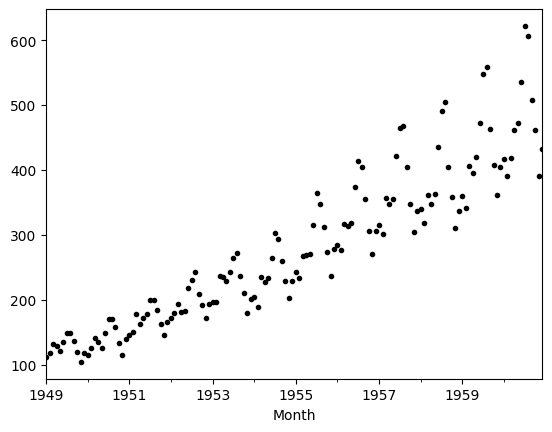

In [16]:
data.plot(style='k.')
plt.show()

In [19]:
#calculate the mean and standard deviation of the values
X = data.values
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


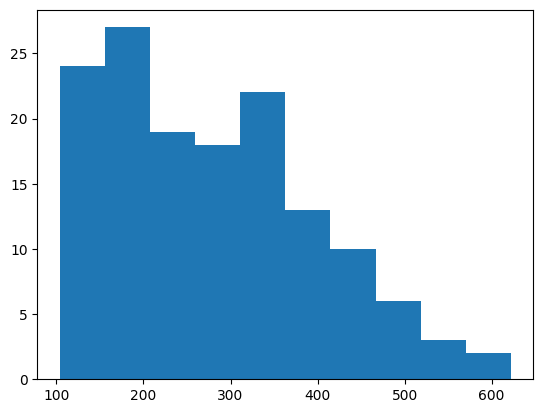

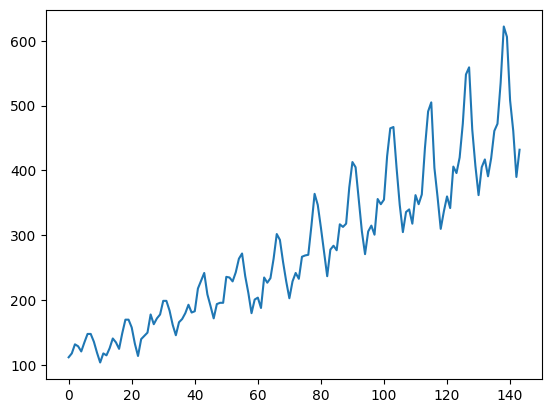

In [28]:
X = data.values
X = np.array(X)
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

In [32]:
#calculate the mean and standard deviation of the values
X = data.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


### 3. Checking it is stationay or not 

In [30]:
X = data.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [31]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0, squeeze=True)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

C:\Users\Hp\AppData\Local\Temp\ipykernel_6376\172424716.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0, squeeze=True)


ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


#### It is not stationary 
Running the example shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.
It will be stationary if p-value<=0.05.

### 4. Performing differencing to make  it stationary. 

In [33]:
# First-order differencing to make the data stationary
stationary_data = data.diff().dropna()

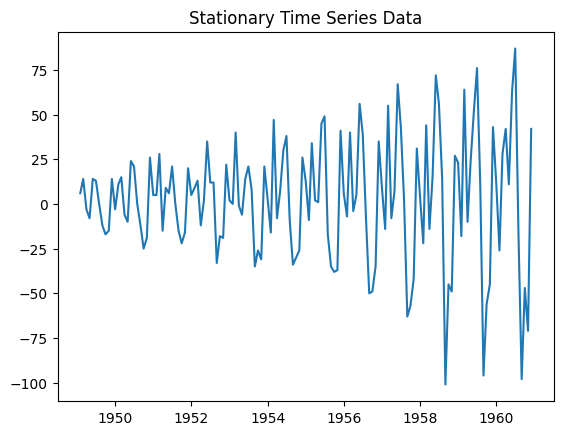

In [34]:
# Plot the stationary time series data
plt.plot(stationary_data)
plt.title('Stationary Time Series Data')
plt.show()

In [37]:
X = stationary_data.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


### Now It is stationay 
Because p-value = 0.05

### 5. Perform Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


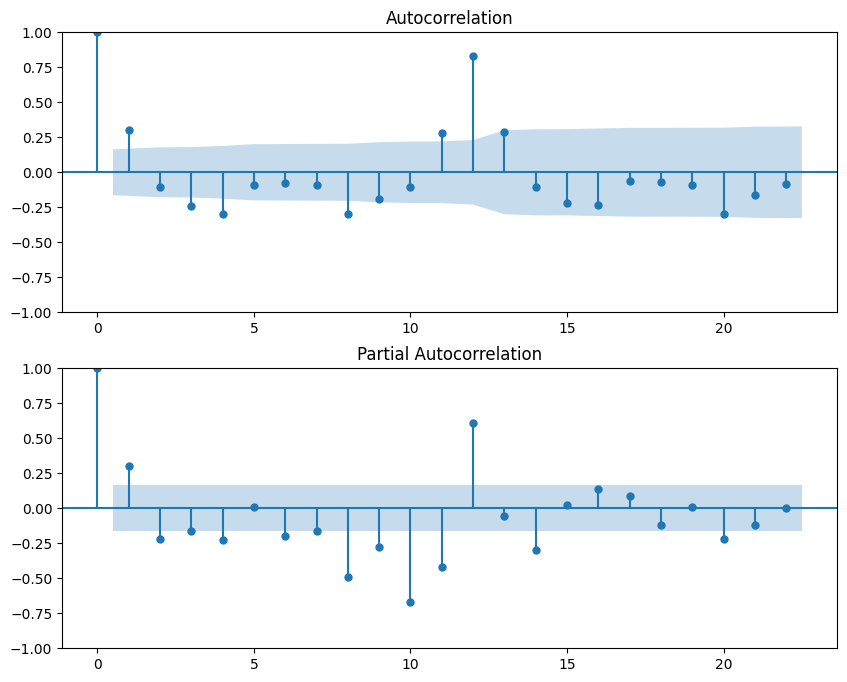

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create ACF and PACF plots for the time series data
fig, ax = plt.subplots(2,1, figsize=(10,8))
plot_acf(stationary_data, ax=ax[0])
plot_pacf(stationary_data, ax=ax[1])

# Display the plots
plt.show()

### 6. Train an ARIMA model on the dataset and make predictions for the next 12 months.

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    14.775908
1961-02-01     6.256169
1961-03-01     3.589929
1961-04-01     2.755533
1961-05-01     2.494410
1961-06-01     2.412692
1961-07-01     2.387119
1961-08-01     2.379116
1961-09-01     2.376611
1961-10-01     2.375827
1961-11-01     2.375582
1961-12-01     2.375505
Freq: MS, Name: predicted_mean, dtype: float64


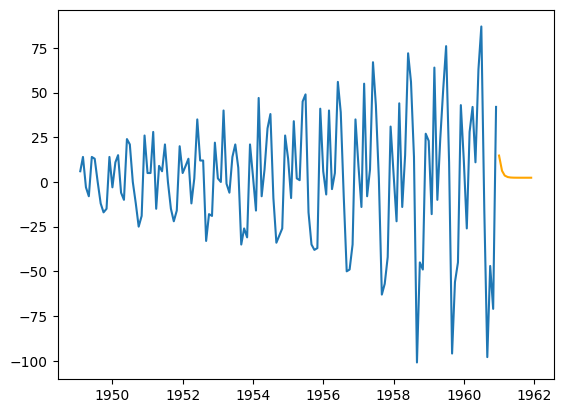

In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model with (p,d,q) = (1,1,1)
model = ARIMA(stationary_data, order=(1,1,1))
results = model.fit()

# Make predictions for the next 12 months
forecast = results.forecast(steps=12)

# Print the forecasted values for the next 12 months
print(forecast)

# Plot the forecasted values along with the original data
plt.plot(stationary_data)
plt.plot(forecast, color='orange')
plt.show()


### 7. Using Root Mean Squared Error (RMSE) and visualize the predicted 

RMSE: 53.14


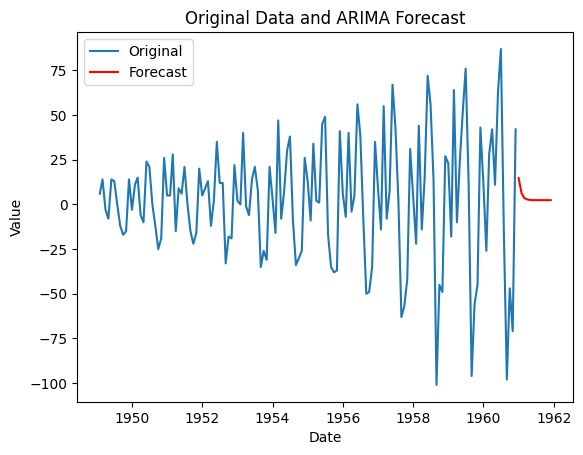

In [50]:
from sklearn.metrics import mean_squared_error

# Compute RMSE for the forecasted values
mse = mean_squared_error(stationary_data[-12:], forecast)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

# Plot the original data and forecasted values
plt.plot(stationary_data)
plt.plot(forecast, color='red')
plt.title('Original Data and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(['Original', 'Forecast'])
plt.show()
